# Modified Data with Swapped Images
This notebook aims at creating a small dataset in which the images do not corrispond to the correct question, that is, we are associating a question to an unrelated image for testing purposes. The goal is to determine the robustness of MLLMs in identifying such mistakes.

For demonstration purposes, we select datapoints for swapping based on ease of interpretation by humans. 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image, ImageOps
import numpy as np

In [ ]:
# Read the csv file as dataframe (data/raw/ScienceQA_test_mc_images.csv), 
FILEPATH = "../../data/raw/ScienceQA_test_mc_images.csv"
OUTPATH = "../../data/raw/ScienceQA_test_mc_images_mod.csv"
IMAGE_PATH = "../../data/raw/ScienceQA_images/test"

In [37]:
import pandas as pd

swap_map = {
    "11": "111",
    "286": "2045",
    "62": "92",
    "288": "158",
}
full_map = {**swap_map, **{v: k for k, v in swap_map.items()}}

df = pd.read_csv(FILEPATH, dtype={'question_id': str})
df_filtered = df[df["question_id"].isin(full_map.keys())].copy()
df_filtered["question_id"] = df_filtered["question_id"].map(full_map)

In [39]:
print(full_map.keys())
df_filtered = df[df["question_id"].isin(full_map.keys())]
df_filtered.to_csv(OUTPATH, index=False)

dict_keys(['11', '286', '62', '288', '111', '2045', '92', '158'])


In [40]:
inverse_map = {v: k for k, v in swap_map.items()}

# Recover original question_id
df_filtered = df_filtered.copy()
df_filtered["original_question_id"] = df_filtered["question_id"].map(inverse_map)

In [41]:
full_map = {**swap_map, **{v: k for k, v in swap_map.items()}}
df_filtered["original_question_id"] = df_filtered["question_id"].map(full_map)

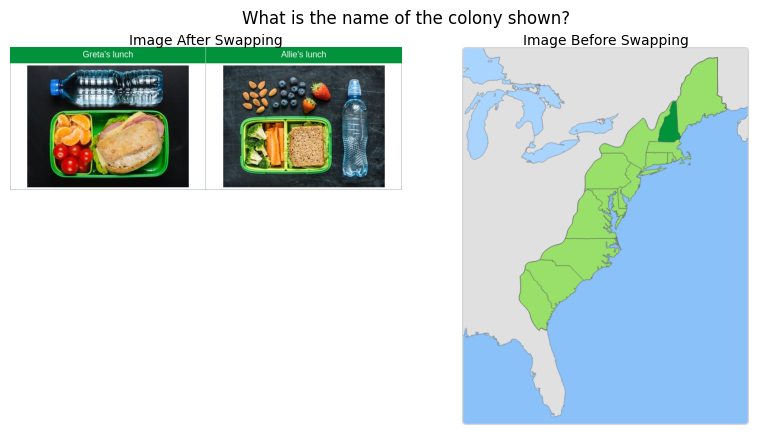

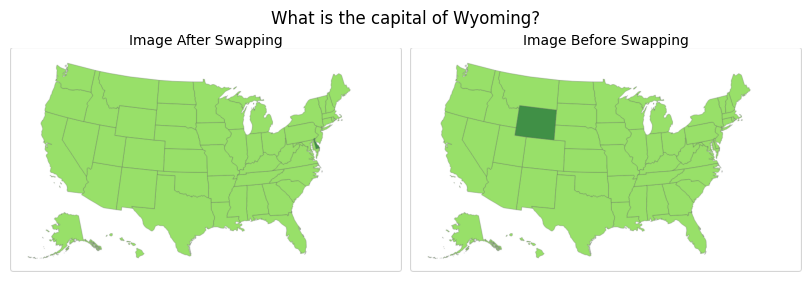

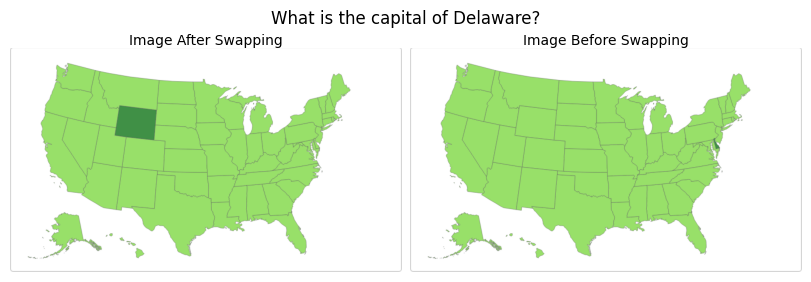

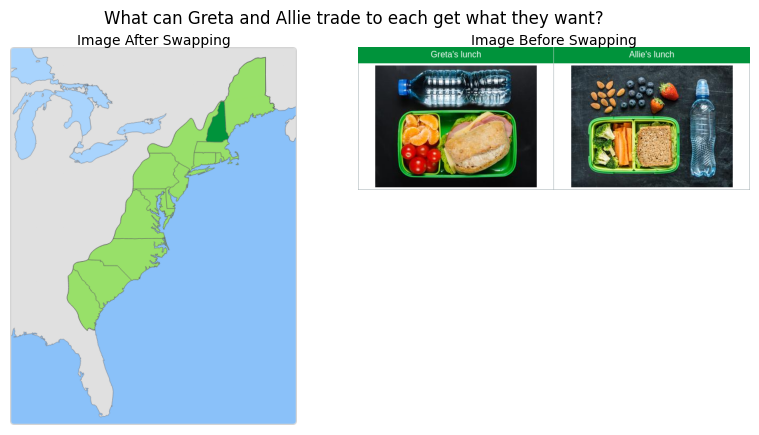

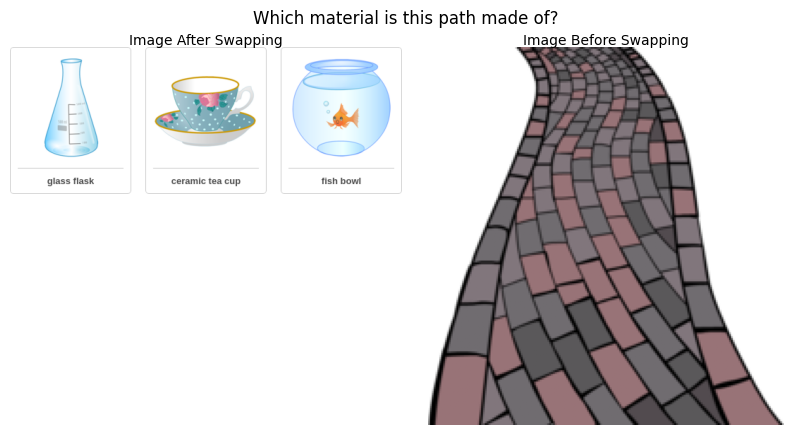

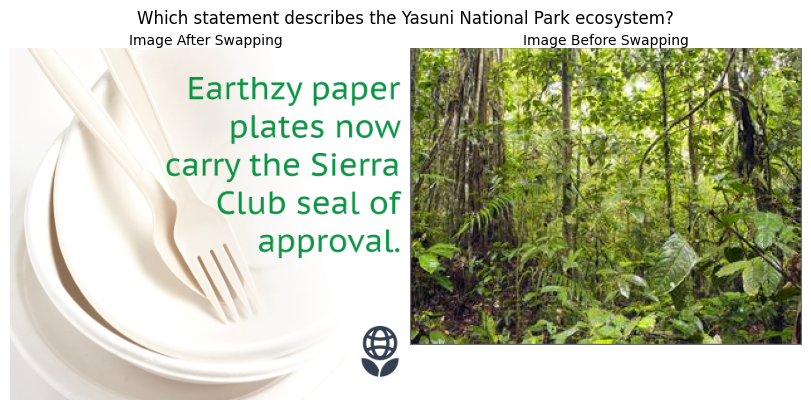

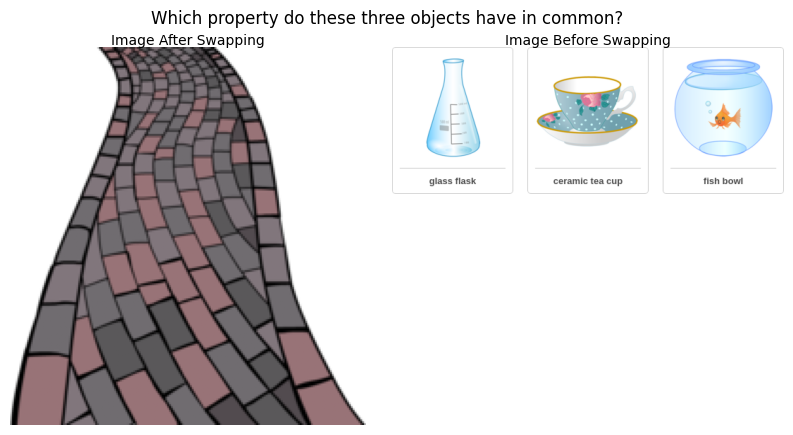

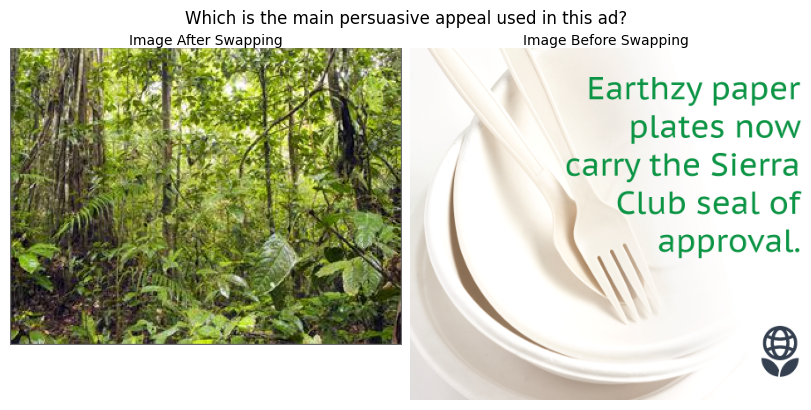

In [ ]:
for i, row in df_filtered.iterrows():
    orig_id = row["original_question_id"]
    swapped_id = row["question_id"]
    question_text = row["question"]

    orig_path = os.path.join(IMAGE_PATH, str(orig_id), "image.png")
    swap_path = os.path.join(IMAGE_PATH, str(swapped_id), "image.png")

    try:
        img_orig = mpimg.imread(orig_path)
        img_swap = mpimg.imread(swap_path)
    except FileNotFoundError:
        print(f"Missing image for question_id {orig_id} or {swapped_id}")
        continue

    fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)
    fig.suptitle(question_text, fontsize=12, wrap=True, y=1.05)

    axs[0].imshow(img_orig)
    axs[0].axis('off')
    axs[0].set_title("Image After Swapping", fontsize=10, verticalalignment='top', pad=30)
    axs[0].set_anchor("N")  

    axs[1].imshow(img_swap)
    axs[1].axis('off')
    axs[1].set_title("Image Before Swapping", fontsize=10, verticalalignment='top', pad=30)
    axs[1].set_anchor("N")

    plt.show()
